## Creating immage from scratch

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import cv2

In [82]:
black = np.zeros([150,200,3],'uint8')
white = 255*(black+1)
ones = np.ones([300,300,3],'uint8')
color_g,color_r,color_b = ones.copy(),ones.copy(),ones.copy()
color_g[:,:] = (0,255,0)
color_b[:,:] = (0,0,255)
color_r[:,:] = (255,0,0)
images = [black,white,color_g,color_r,color_b]

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


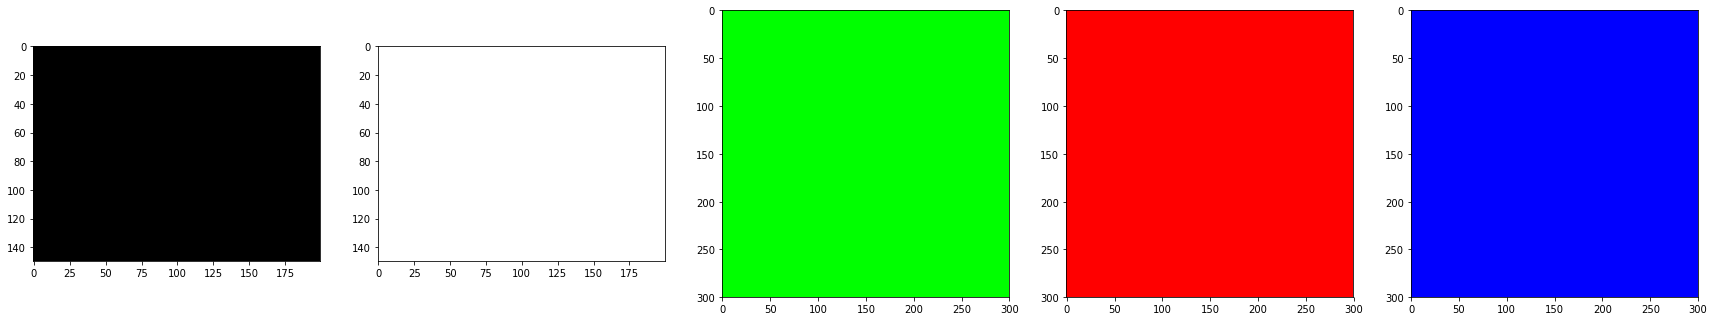

In [83]:
fig = plt.figure(figsize = (36, 32)) 
for i in range(len(images)):
    ax = fig.add_subplot(1, 6, i +1)
    ax.imshow(images[i],cmap = 'gray')

## Translation

In [4]:
img = cv2.imread("assets/ayu.png")
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)

In [5]:
rows,cols,h = img.shape
M = np.float32([[1,0,-50],[0,1,-50]])
img = cv2.warpAffine(img,M,(cols,rows))

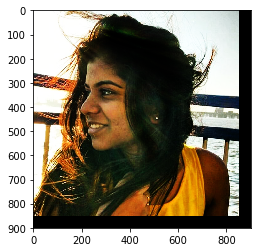

In [6]:
plt.imshow(img)

In [7]:
img = cv2.imread("assets/ayu.png")
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
M = cv2.getRotationMatrix2D((cols/2,rows/2),70,1)
img = cv2.warpAffine(img,M,(cols,rows))

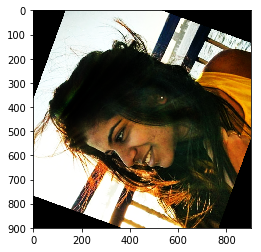

In [8]:
plt.imshow(img)

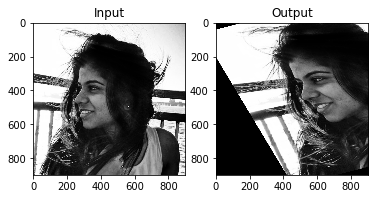

In [9]:
img = cv2.imread("assets/ayu.png",0)
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
pts1 = np.float32([[50,50],[200,50],[50,200]])
pts2 = np.float32([[10,100],[200,50],[100,250]])

M = cv2.getAffineTransform(pts1,pts2)

dst = cv2.warpAffine(img,M,(cols,rows))

plt.subplot(121),plt.imshow(img),plt.title('Input')
plt.subplot(122),plt.imshow(dst),plt.title('Output')
plt.show()

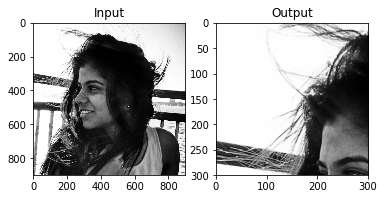

In [10]:
img = cv2.imread("assets/ayu.png",0)
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)

pts1 = np.float32([[56,65],[368,52],[28,387],[389,390]])
pts2 = np.float32([[0,0],[300,0],[0,300],[300,300]])

M = cv2.getPerspectiveTransform(pts1,pts2)

dst = cv2.warpPerspective(img,M,(300,300))

plt.subplot(121),plt.imshow(img),plt.title('Input')
plt.subplot(122),plt.imshow(dst),plt.title('Output')
plt.show()

## Image Thresholding

In [11]:
img = cv2.imread("assets/ayu.png",0)
ret,thresh1 = cv2.threshold(img,127,255,cv2.THRESH_BINARY)
ret,thresh2 = cv2.threshold(img,127,255,cv2.THRESH_BINARY_INV)
ret,thresh3 = cv2.threshold(img,127,255,cv2.THRESH_TRUNC)
ret,thresh4 = cv2.threshold(img,127,255,cv2.THRESH_TOZERO)
ret,thresh5 = cv2.threshold(img,127,255,cv2.THRESH_TOZERO_INV)
img = cv2.medianBlur(img,7)
th2 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_MEAN_C,cv2.THRESH_BINARY,11,2)
th3 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY,11,2)
ret2,th4 = cv2.threshold(img,0,255,cv2.THRESH_OTSU)

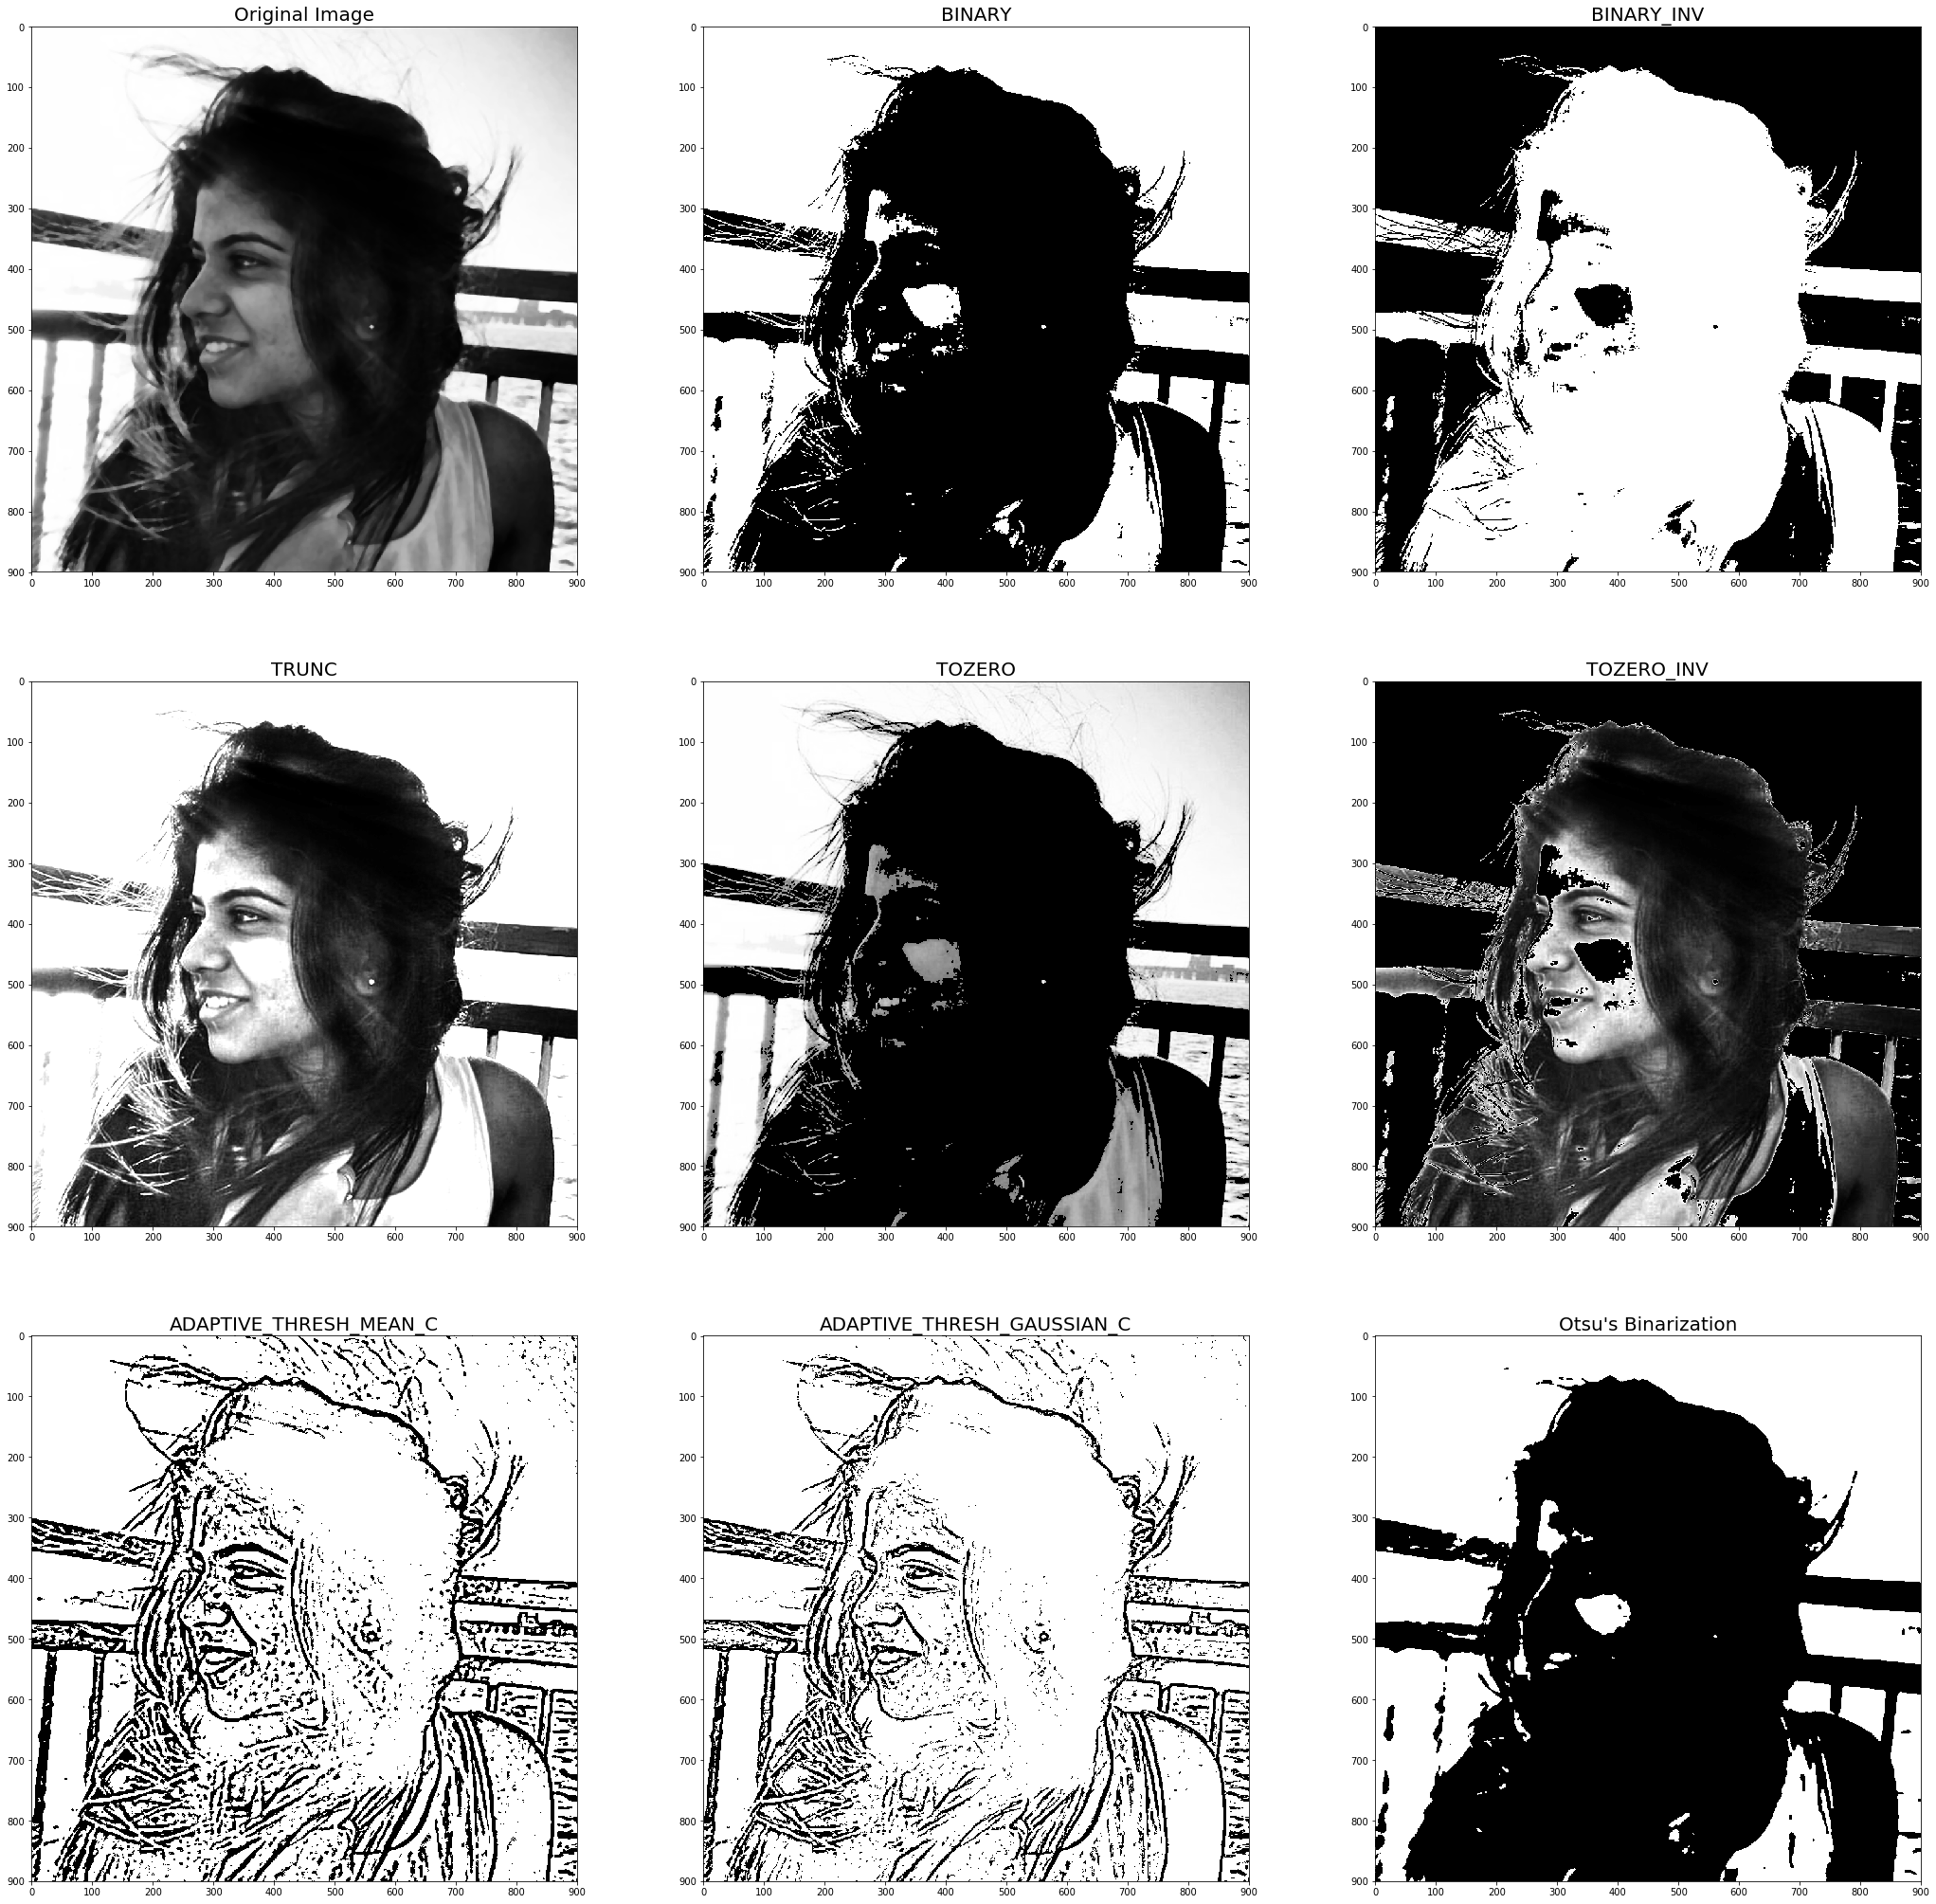

In [12]:
titles = ['Original Image','BINARY','BINARY_INV','TRUNC','TOZERO','TOZERO_INV','ADAPTIVE_THRESH_MEAN_C','ADAPTIVE_THRESH_GAUSSIAN_C','Otsu\'s Binarization']
images = [img, thresh1, thresh2, thresh3, thresh4, thresh5,th2,th3,th4]

fig = plt.figure(figsize = (36, 36)) 
for i in range(len(images)):
    ax = fig.add_subplot(3, 3, i +1)
    ax.imshow(images[i],cmap = 'gray')
    ax.set_title(titles[i],fontsize=20)

plt.show()


## Making Borders/padding and image addtion


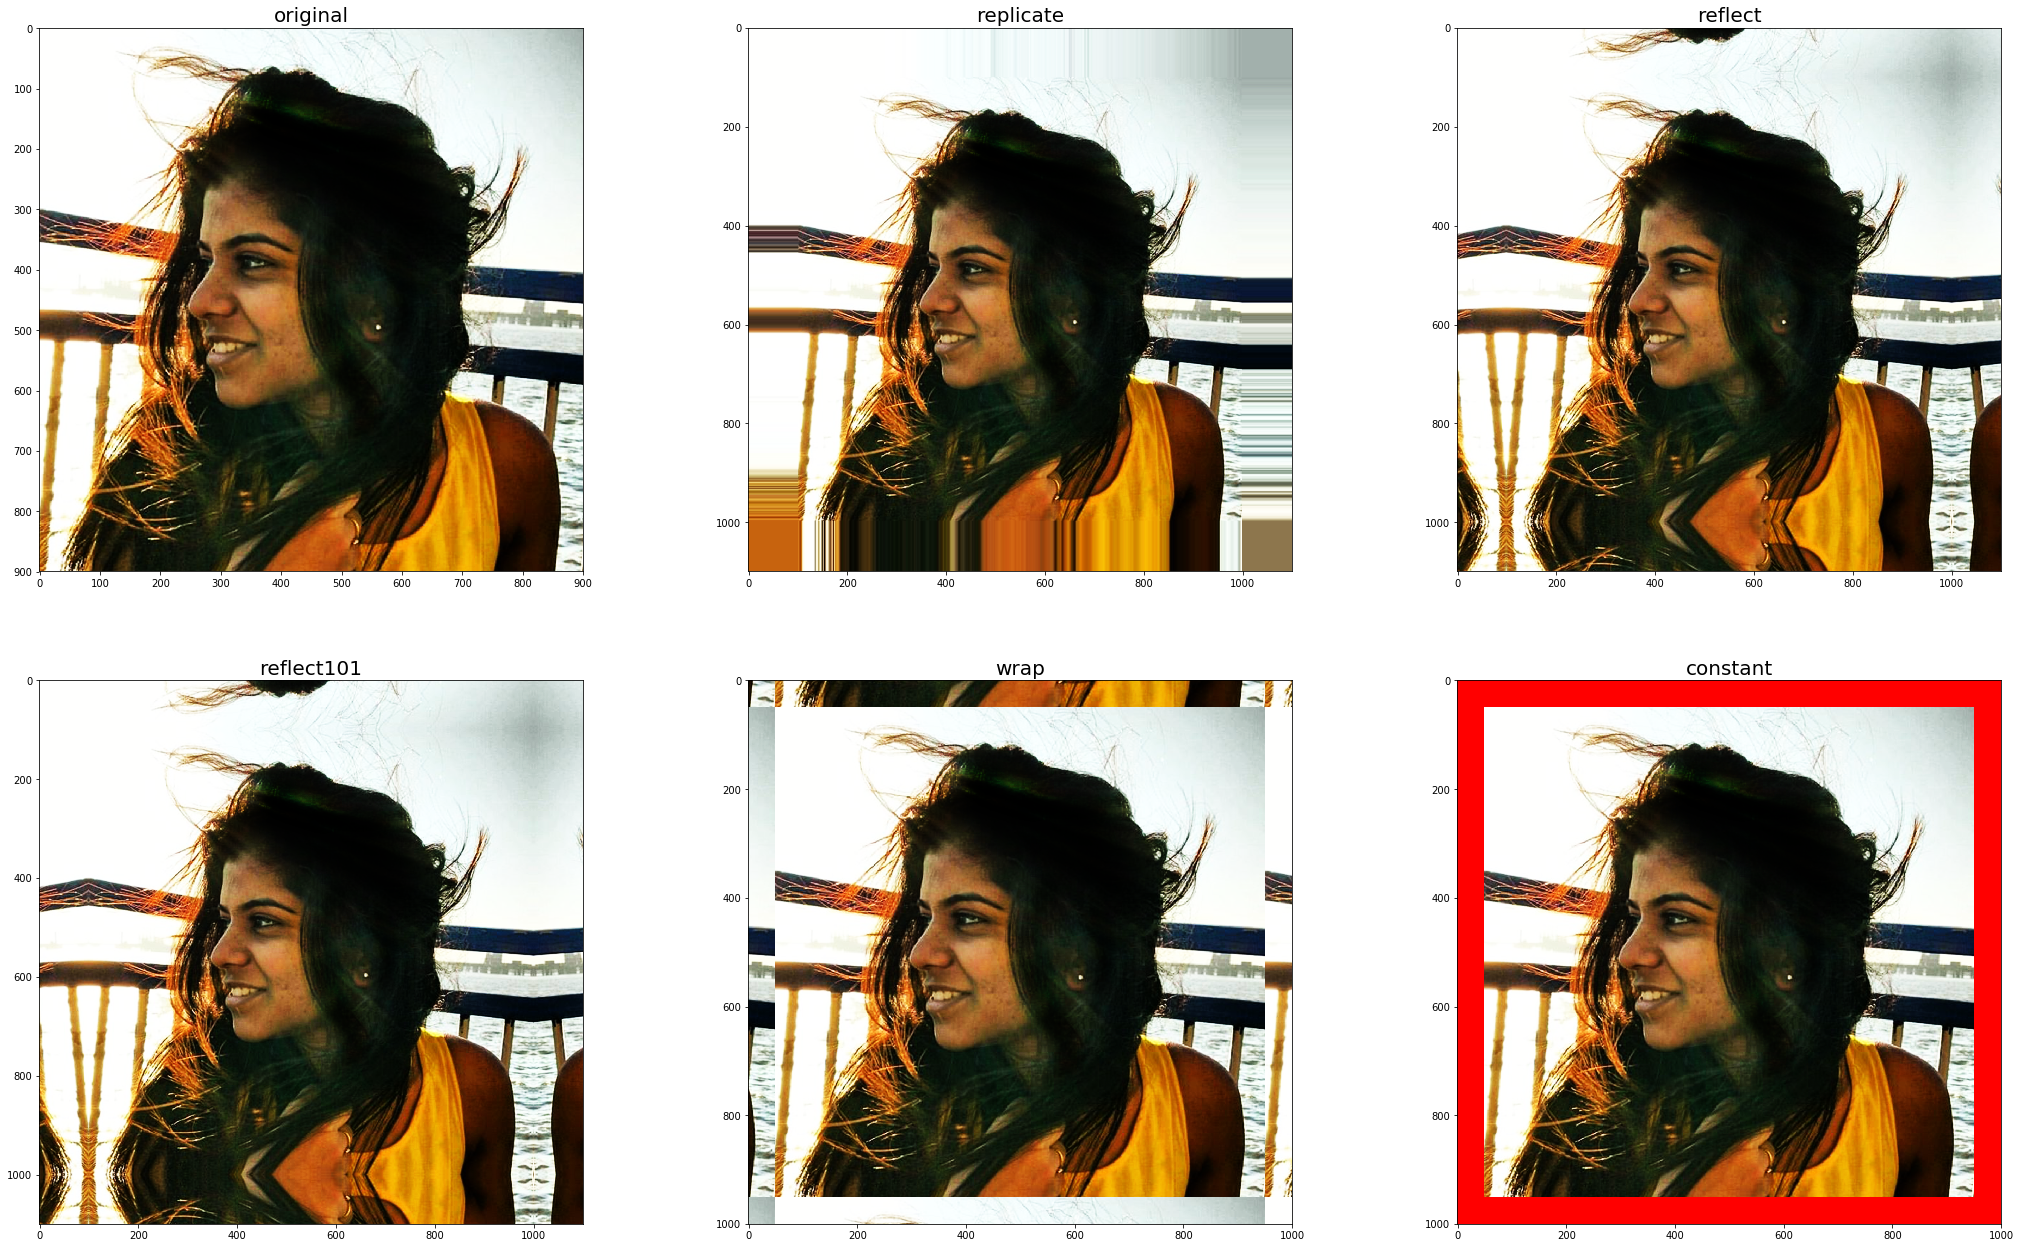

In [20]:
img = cv2.imread("assets/ayu.png")
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)

BLUE = [255,0,0]

original = img
replicate = cv2.copyMakeBorder(img,100,100,100,100,cv2.BORDER_REPLICATE)
reflect = cv2.copyMakeBorder(img,100,100,100,100,cv2.BORDER_REFLECT)
reflect101 = cv2.copyMakeBorder(img,100,100,100,100,cv2.BORDER_REFLECT_101)
wrap = cv2.copyMakeBorder(img,50,50,50,50,cv2.BORDER_WRAP)
constant= cv2.copyMakeBorder(img,50,50,50,50,cv2.BORDER_CONSTANT,value=BLUE)

images_list = ["original","replicate","reflect","reflect101","wrap","constant"]

fig = plt.figure(figsize = (36, 22)) 
for i in range(len(images_list)):
    ax = fig.add_subplot(2, 3, i +1)
    ax.imshow(eval(images_list[i]),cmap = 'gray')
    ax.set_title(images_list[i],fontsize=20)


In [43]:
img = cv2.imread("assets/ayu.png")
img_t = cv2.imread("assets/ayu_text.png")
img_t =  cv2.resize(img_t,(900,900))

In [44]:
dst = cv2.addWeighted(img,0.7,img_t,0.3,0)

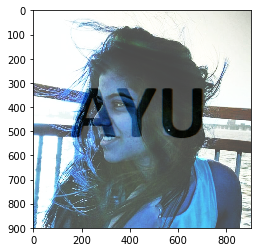

In [45]:
plt.imshow(dst)

## Convolution 2D, Smoothing images

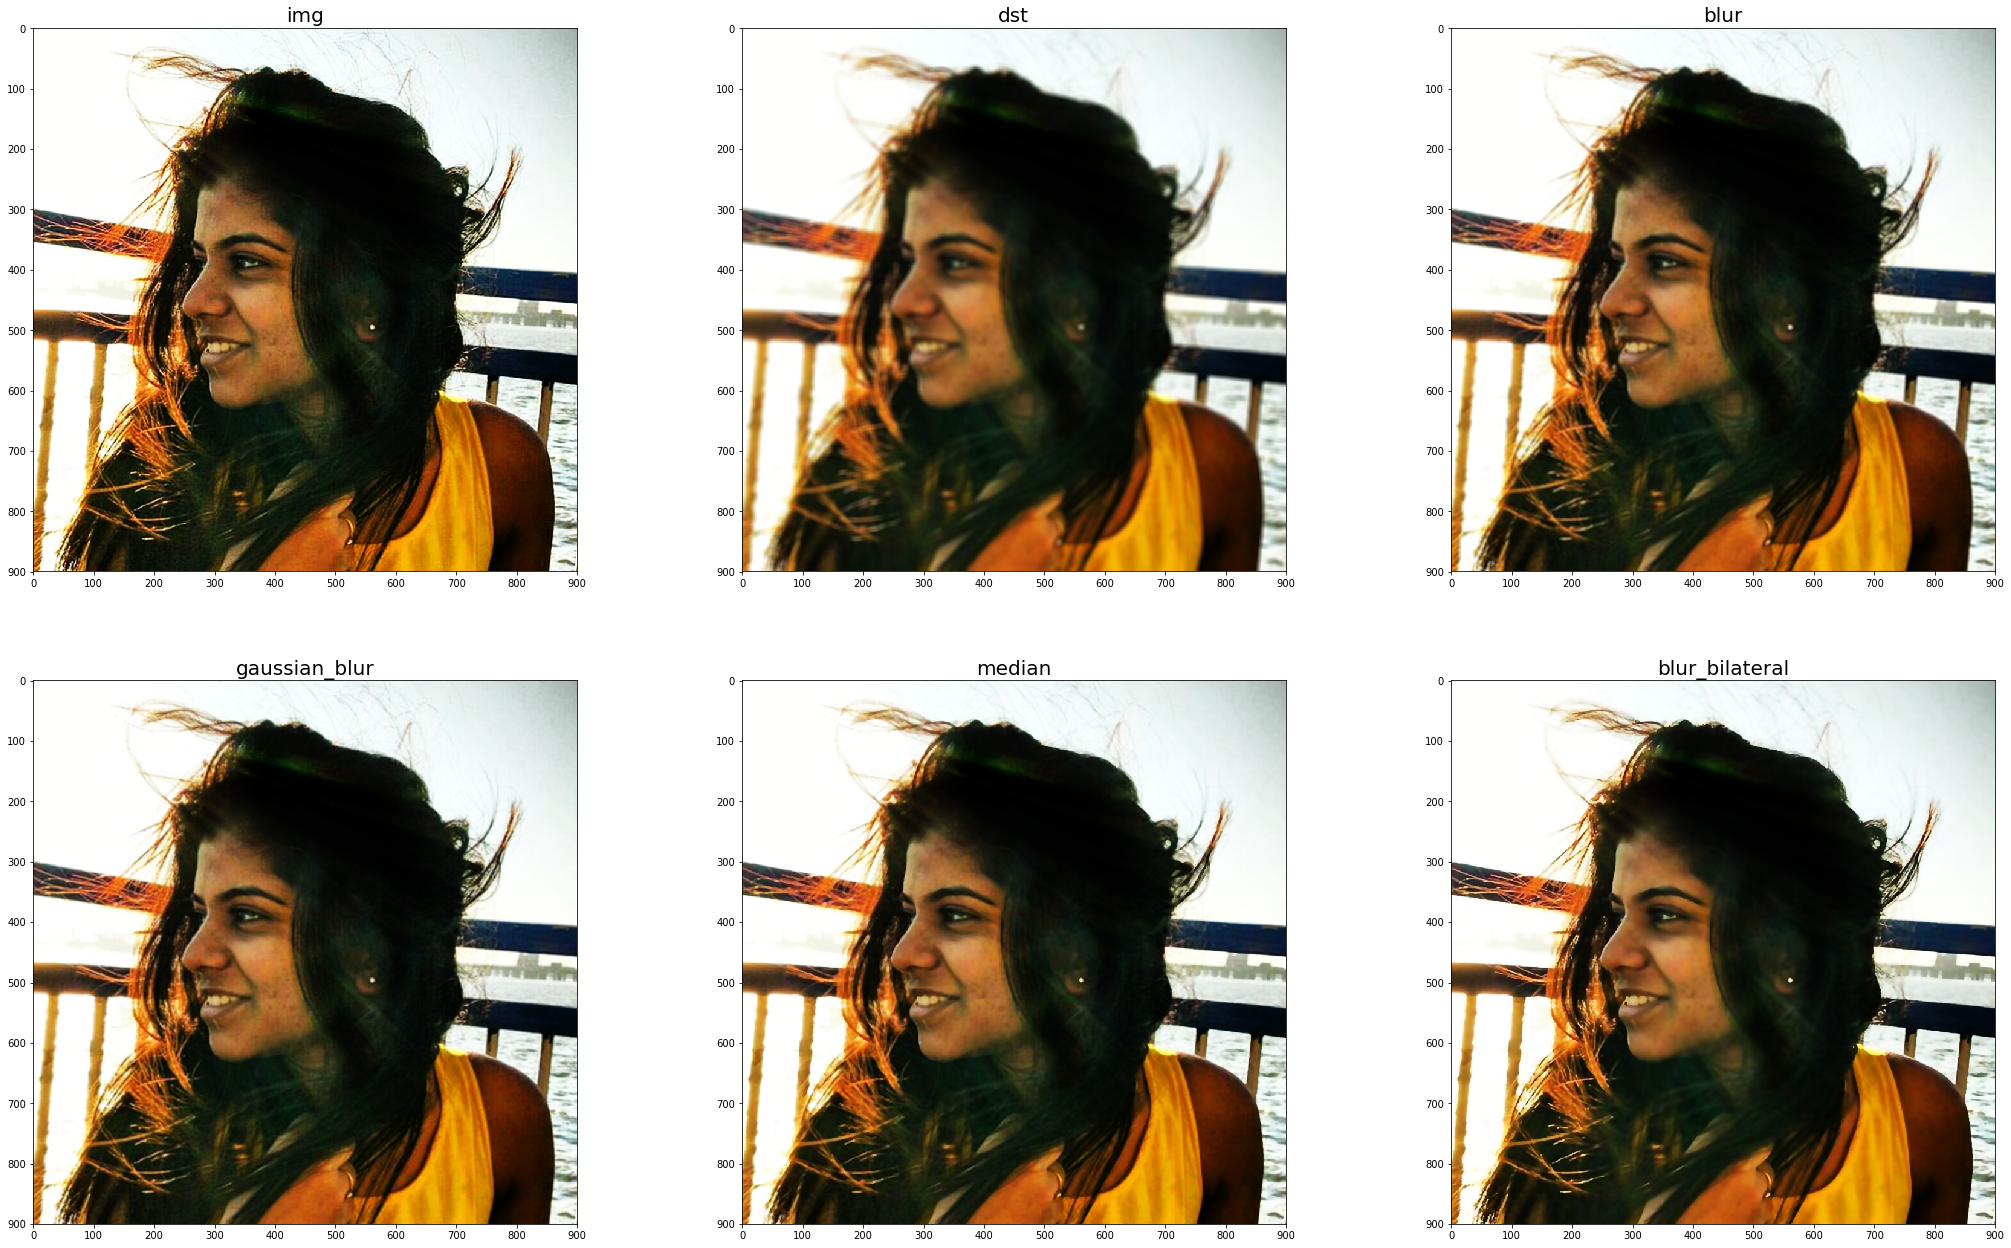

In [66]:
kernel = np.ones((9,9),np.float32)/81
img = cv2.imread("assets/ayu.png")
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
dst = cv2.filter2D(img,-1,kernel)
blur = cv2.blur(img,(5,5))
gaussian_blur = cv2.GaussianBlur(img,(5,5),0)
median = cv2.medianBlur(img,5)
blur_bilateral = cv2.bilateralFilter(img,9,75,75)

images_list = ["img","dst",'blur','gaussian_blur','median','blur_bilateral']

fig = plt.figure(figsize = (36, 22)) 
for i in range(len(images_list)):
    ax = fig.add_subplot(2, 3, i +1)
    ax.imshow(eval(images_list[i]),cmap = 'gray')
    ax.set_title(images_list[i],fontsize=20)


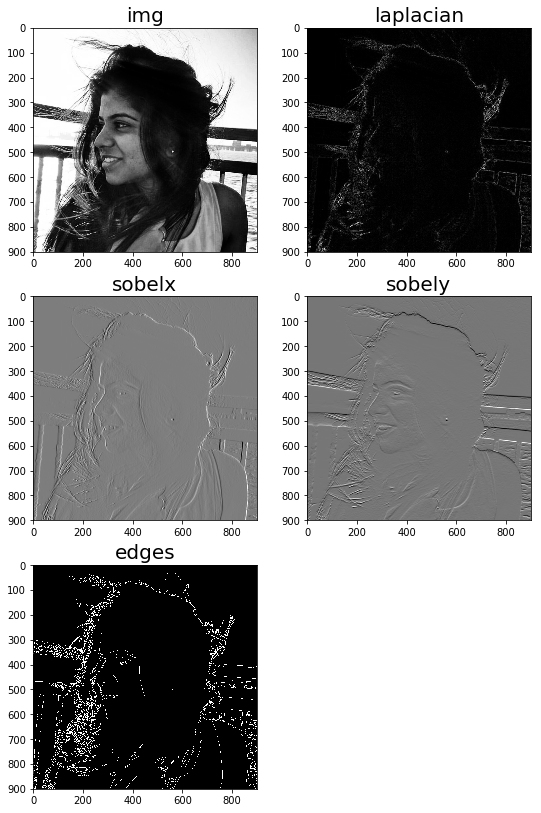

In [91]:
img = cv2.imread("assets/ayu.png",0)


laplacian = cv2.Laplacian(img,cv2.CV_64F)
sobelx = cv2.Sobel(img,cv2.CV_64F,1,0,ksize=7)
sobely = cv2.Sobel(img,cv2.CV_64F,0,1,ksize=7)
edges = cv2.Canny(img,100,200)

laplacian = np.uint8(np.absolute(laplacian))
#sobelx = np.uint8(np.absolute(sobelx))
#sobely = np.uint8(np.absolute(sobely))

images_list = ["img","laplacian",'sobelx','sobely',"edges"]

fig = plt.figure(figsize = (9, 14)) 
for i in range(len(images_list)):
    ax = fig.add_subplot(3, 2, i +1)
    ax.imshow(eval(images_list[i]),cmap = 'gray')
    ax.set_title(images_list[i],fontsize=20)

https://docs.opencv.org/3.0-beta/doc/py_tutorials/py_imgproc/py_morphological_ops/py_morphological_ops.html#morphological-ops
http://homepages.inf.ed.ac.uk/rbf/HIPR2/morops.htm

In [105]:
img_t = cv2.imread("assets/ayu_text.png")
kernel = np.ones((5,5),np.uint8)
erosion = cv2.erode(img_t,kernel,iterations = 1)
dilation = cv2.dilate(img,kernel,iterations = 1)
gradient = cv2.morphologyEx(img_t, cv2.MORPH_GRADIENT, kernel)

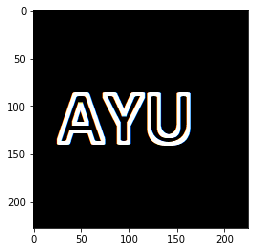

In [106]:
plt.imshow(gradient)